# Basic radon plots



Notes copied from the data file:

    
    Kennaook Cape Grim Baseline Air Pollution Station (KCG-BAPS)		
            
    Hourly radon data set (no response time correction applied), including uncertainty estimates and internal T/P/RH data 
    Period: 2024 
    Status: Preliminary Processed 
    Station: Kennaook Cape Grim: Lat 40.6838° South; Lon 144.6898° East; Elevation 164m amsl 
            
    Column headers		
    datetime		Timestamp for plots
    interval_start_utc		Start of measurement interval, UTC
    interval_end_utc		End of measurement interval, UTC
    radon		Radon concentration (activity) in Bq m-3 based on total counts observed between interval_start and interval_end
    radon_stddev		Uncertainty estimate (square root of total hourly count, expressed as a concentration in Bq m-3)
    airt		Temperature inside detector, average of 10-sec samples (°C)
    pres		Air pressure inside detector, average of 10-sec samples (hPa)
    relhum		Relative humidity inside detector, average of 10-sec samples (%)
            
            
    Dataset notes		
    Concentrations are calibrated 60-min net counts (total counts with instrumental background removed)		
    Radon detectors: Primary HURD3 5000L (8 heads) ONLY, secondary BHURD 1500L (1 head) data is not included		
    No STP corrections have been applied		
    No response time correction has been applied to the data (recommend 60min)		
    Missing data: All periods of missing or invalid data are flagged with -9999 (see also "Source" column)		
    Timestamp is: UTC		
            
    Uncertainty estimates: see discussions in references		
            
    References		
    Whittlestone, S. and Zahorowski, W. 1998. Baseline radon detectors for shipboard use: development and deployment in the first Aerosol Characterization Experiment (ACE 1). J. Geophys. Res. 103, 16743 16751.		
    Williams AG and Chambers SD 2016: ‘A history of radon measurements at Cape Grim’, Baseline Atmospheric Program (Australia) History and Recollections (40th Anniversary Special Edition), 131-146.		
    Zahorowski et al. 2013: 'Constraining annual and seasonal radon-222 flux density from the Southern Ocean using radon-222 concentrations in the boundary layer at Cape Grim', Tellus B 2013, 65, 19622, http://dx.doi.org/10.3402/tellusb.v65i0.19622		
    Chambers SD, Preunkert S, Weller R, Hong S-B, Humphries RS, Tositti L, Angot H, Legrand M, Williams AG, Griffiths AD, Crawford J, Simmons J, Choi TJ, Krummel PB, Molloy S, Loh Z, Galbally I, Wilson S, Magand O, Sprovieri F, Pirrone N and Dommergue A, 2018: 'Characterizing Atmospheric Transport Pathways to Antarctica and the Remote Southern Ocean Using Radon-222', Front. Earth Sci. 6:190. https://doi.org/10.3389/feart.2018.00190 		
            
    Publication / acknowledgement policy		
    Acknowledgment should be made of the Australian Bureau of Meteorology, KCGBAPS, ANSTO and the contact persons listed below in any publication, presentation or report which makes use of these data.		
    If a publication makes substantial use of these data, the appropriate ANSTO research staff member(s) would expect to be asked to be co-author(s).		
            
    Contact persons		
    Dr Scott Chambers (Co-Lead Scientist, Cape Grim Radon program)		
    Australian Nuclear Science and Technology Organisation (ANSTO)		
    Email: Scott.Chambers@ansto.gov.au		
            
    Dr Alan Griffiths (Co-Lead Scientist, Cape Grim Radon program)		
    Australian Nuclear Science and Technology Organisation (ANSTO)		
    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [12, 6]


fname = "./PRELIMINARY_HURD_radon_2024.xlsx"

In [2]:
df = pd.read_excel(fname, sheet_name="hourly_data", index_col="datetime")

Text(0.5, 0, 'UTC')

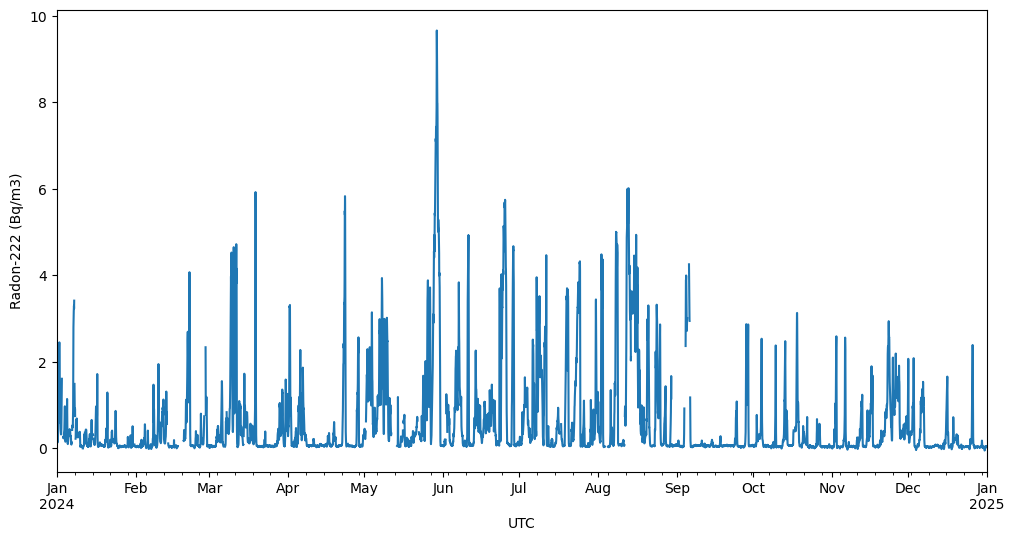

In [3]:
ax = df.radon.plot()
ax.set_ylabel("Radon-222 (Bq/m3)")
ax.set_xlabel("UTC")


**Zoom to a (mostly) baseline period**

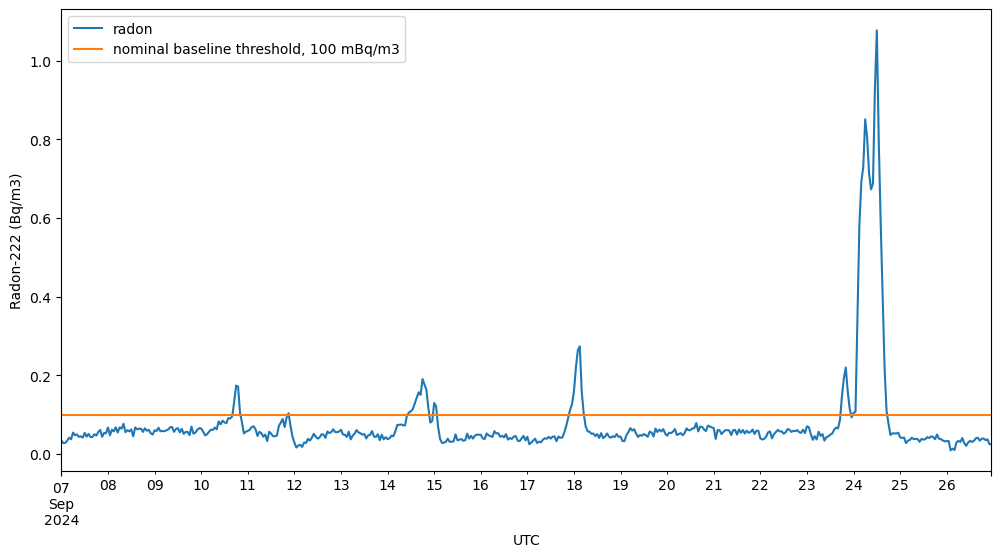

In [4]:
ax = df.loc["2024-09-07":"2024-09-26"].radon.plot(label='radon')
ax.set_ylabel("Radon-222 (Bq/m3)")
ax.set_xlabel("UTC")
ax.axhline(0.1, label='nominal baseline threshold, 100 mBq/m3', color='C1')
ax.legend()

**On log-scale...**

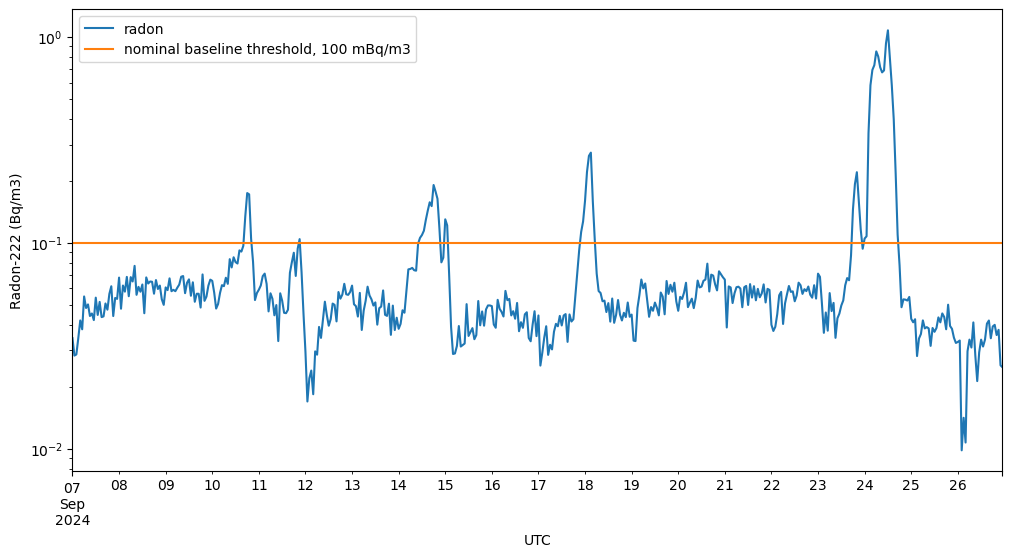

In [5]:
ax.set_yscale("log")
ax.figure

**Extended period of strong land influence**

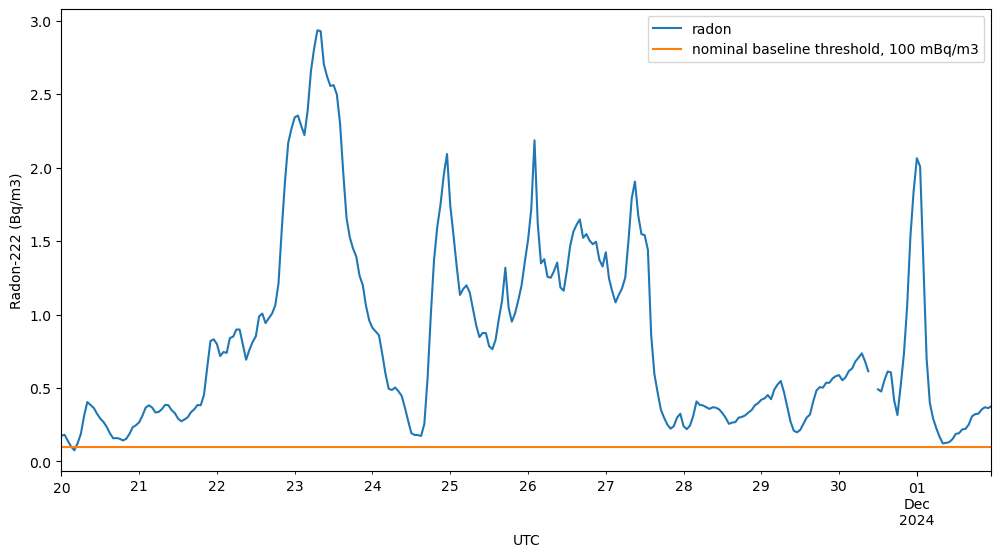

In [6]:
ax = df.loc["2024-11-20":"2024-12-01"].radon.plot(label='radon')
ax.set_ylabel("Radon-222 (Bq/m3)")
ax.set_xlabel("UTC")
ax.axhline(0.1, label='nominal baseline threshold, 100 mBq/m3', color='C1')
ax.legend()

**Nistogram, highly skewed distribution...**

Text(0.5, 0, 'Radon (Bq/m3)')

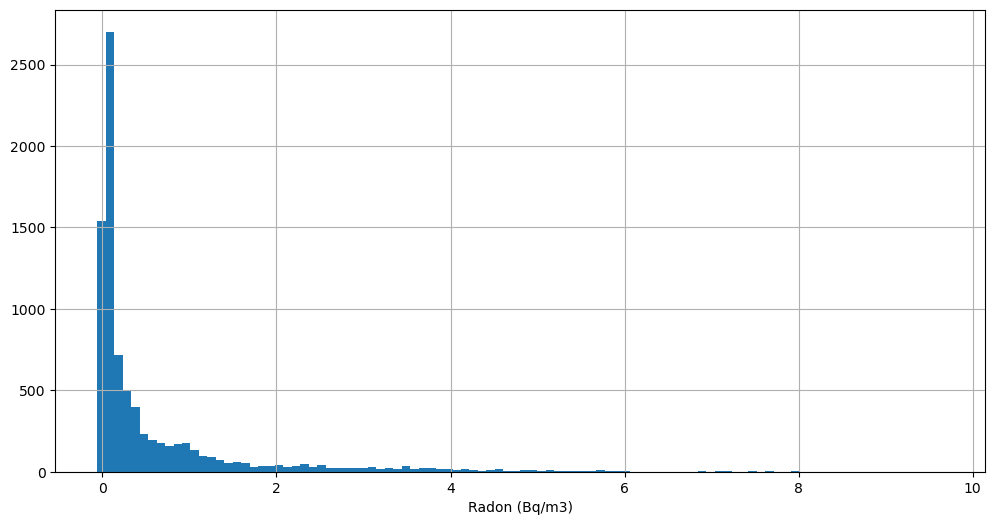

In [7]:
fig, ax = plt.subplots()
df.radon.hist(bins=100, ax=ax)
ax.set_xlabel('Radon (Bq/m3)')

**...better plotted in log-scaled bins**

You end up with a multimodal distribution, with the strongest mode centred around oceanic baseline conditions and then a wide mode (or perhaps multiple modes) at higher radon concentrations.

/home/alan/miniforge3/envs/es311/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0, 'log10(radon)')

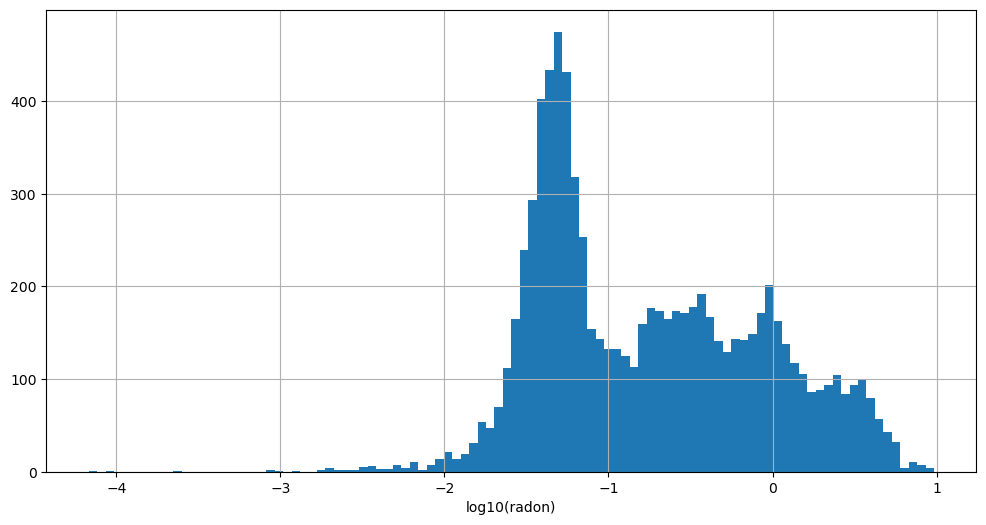

In [8]:
fig, ax = plt.subplots()
np.log10(df.radon).hist(bins=100, ax=ax)
ax.set_xlabel('log10(radon)')